****

**Table of Contents**



```
# This is formatted as code
```


1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA EXPLORATION

  *   3.1 FEATURE ENGINEERING
  *   3.2 OUTLIER DETECTION

4. DATA PREPREPROCESSING

  *   4.1 CLEANING TEXT
  *   4.2 TOKENIZATION
  *   4.3 REMOVING STOPWORDS
  *   4.4 LEMMATIZATION


5. VECTORIZATION

6. MODEL BUILDING

7. EVALUATING MODELS



# IMPORTING LIBRARIES

In [10]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from IPython import get_ipython
from IPython.display import display
import joblib
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# LOADING DATA

In [12]:
data = pd.read_csv("spam.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   v1          5572 non-null   object 
 1   v2          5572 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 217.8+ KB


In [13]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-14-b0037516d03f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["Target"], palette= cols)


Text(0, 0.5, 'Number of Data points')

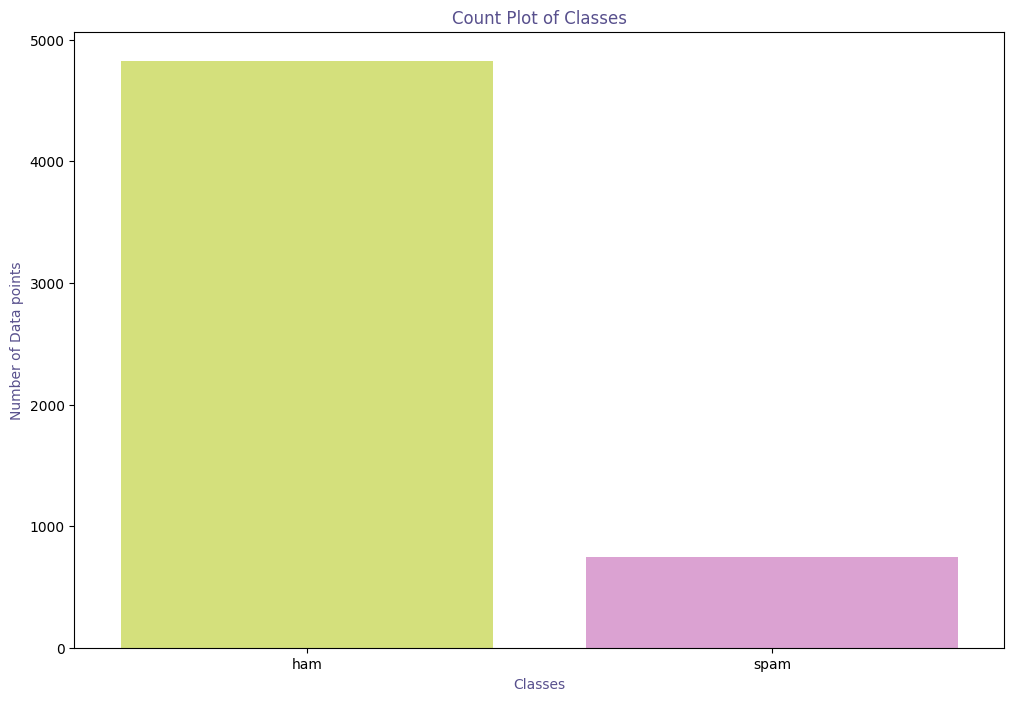

In [14]:
#Palette
cols= ["#E1F16B", "#E598D8"]
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Target"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

# DATA EXPLORATION

**FEATURE ENGINEERING**


In [15]:
data["No_of_Characters"] = data["Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.494616,59.998745,2.0,36.0,61.0,122.0,910.0
No_of_Words,5572.0,18.812635,13.849814,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,2.004666,1.539516,1.0,1.0,2.0,2.0,38.0


<Figure size 1200x800 with 0 Axes>

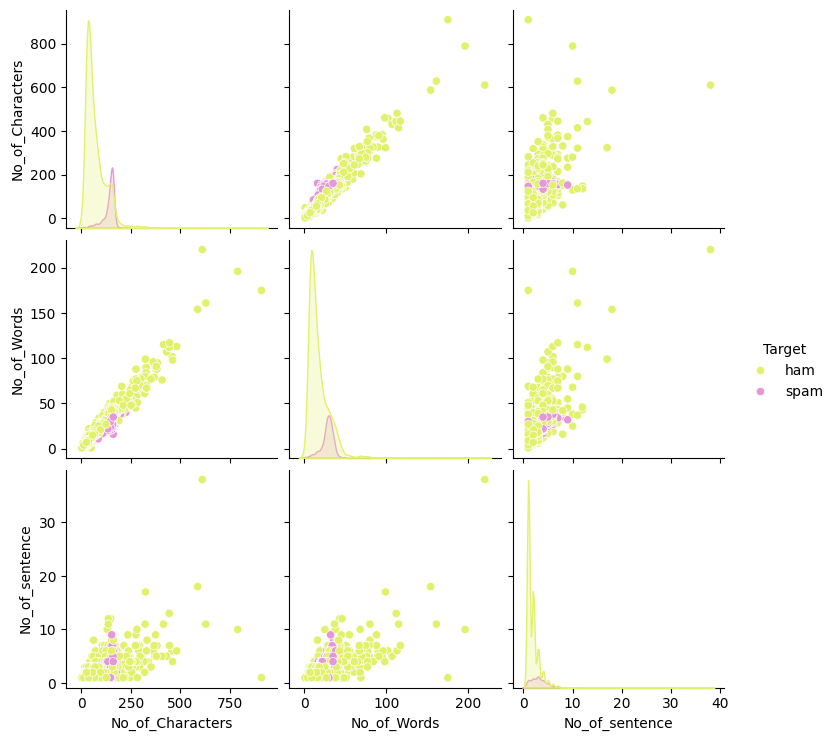

In [16]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=cols)
plt.show(fg)

**OUTLIER DETECTION**



<Figure size 1200x800 with 0 Axes>

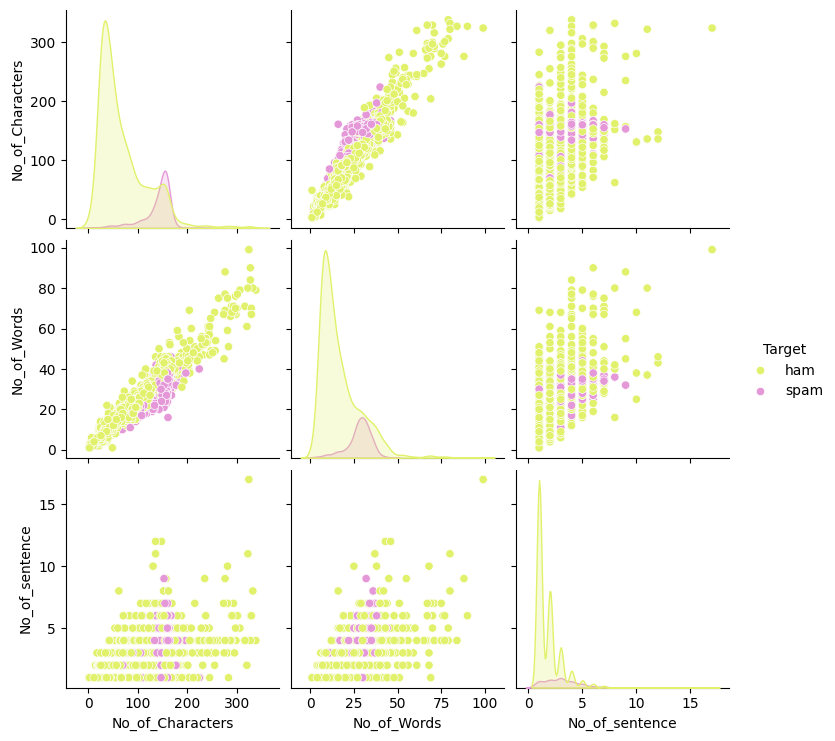

In [17]:
#Dropping the outliers.
data = data[(data["No_of_Characters"]<350)]
data.shape
(5548, 5)
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=cols)
plt.show(fg)

***CLEANING TEXT***

The data cleaning process NLP is crucial. The computer doesn’t understand the text. for the computer, it is just a cluster of symbols. To further process the data we need to make the data cleaner.


*  In the first step we extract only the alphabetic characters by this we are removing punctuation and numbers.
*   In the next step, we are converting all the characters into lowercase.

This text will be then used in further procrssing


In [18]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["Text"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [19]:
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text)
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms


data["Clean_Text"] = data["Text"].apply(Clean)
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning \u001b[0m")
print(data["Clean_Text"][0:5])

 The First 5 Texts after cleaning 
0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: Clean_Text, dtype: object


**TOKENIZATION**


**Tokenization** is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words. I am splitting the Clean_Text into words at this step.

In [20]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


**REMOVING STOPWORDS**

**Stopwords** are frequently occurring words(such as few, is, an, etc). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing.

In [21]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


**LEMMATIZATION**

**Stemming** is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes are added. The stem of a word is created by removing the prefix or suffix of a word. It goes back to the etymology of the word. Languages evolve over time. Many different languages branch into each other; for example, English is a derivative of Latin. Thus, stemming a word takes it back to the root word.

**lemmatization** also converts a word to its root form. However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English. If we use lemmatization the output would be in English.

In [22]:
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...


 The First 5 Texts after lemitization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


# **VECTORIZE**

**TF-IDF** in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

Term Frequency (TF) = (Frequency of a term in the document)/(Total number of terms in documents) Inverse Document Frequency(IDF) = log( (total number of documents)/(number of documents with term t)) I will be using TfidfVectorizer() to vectorize the preprocessed data.

**Steps in the Vectorizing:**


*     Creating a corpus of lemmatized text
*   Converting the corpus in vector form
*   Label Encoding the classes in Target

Note: So far we have been stalking up columns in our data for the purpose of explanation

In [23]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [24]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
# Let's have a look at our feature
print(X.dtype) # Print the dtype attribute of X
# Label encode the Target and use it as y
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

float64


#MODEL BUILDING


**Steps involved in the Model Building**



*   Setting up features and target as X and y

*   Splitting the testing and training sets
*   Build a pipeline of model for four different classifiers.

      1.   Naive Bayes
      2.   Random Forest Classifier
      3.   Kneighbors Classifier
      4.   SVM


*  Fit all the models on training data
*  Get the cross-validation on the
training set for all the models for accuracy








In [25]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = data["Target"]
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Save the vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.joblib")
print("TF-IDF Vectorizer saved as 'tfidf_vectorizer.joblib'")

TF-IDF Vectorizer saved as 'tfidf_vectorizer.joblib'


In [27]:
classifiers = [MultinomialNB(),
               RandomForestClassifier(),
               KNeighborsClassifier(),
               SVC()]

pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}
# Dictionary to store trained models
trained_models = {}

for i, cls in enumerate(classifiers):
    cls.fit(X_train, y_train)

    # Save the trained model
    model_name = pipe_dict[i]
    filename = f"{model_name}.joblib"
    joblib.dump(cls, filename)

    trained_models[model_name] = cls  #
    print(f"{model_name} model saved to {filename}")


NaiveBayes model saved to NaiveBayes.joblib
RandomForest model saved to RandomForest.joblib
KNeighbours model saved to KNeighbours.joblib
SVC model saved to SVC.joblib


In [32]:
for i, model_name in pipe_dict.items():
    filename = f"{model_name}.joblib"

    # Load the saved model
    loaded_model = joblib.load(filename)

    cv_score = cross_val_score(loaded_model, X_train, y_train, scoring="accuracy", cv=10)
    print(f"{model_name}: {cv_score.mean():.4f}")

NaiveBayes: 0.9653
RandomForest: 0.9777
KNeighbours: 0.9101
SVC: 0.9743


# EVALUATING MODELS


*  Accuracy Report
*  Confusion Matrix



In [ ]:
for i, model_name in pipe_dict.items():
    filename = f"{model_name}.joblib"
    loaded_model = joblib.load(filename)

# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = loaded_model.score(X_train,y_train)
    test_accuracy = loaded_model.score(X_test,y_test)

    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.991736,0.754717,0.857143,0.977477,0.997746
RandomForest,1.000000,0.849057,0.918367,0.977477,0.997746
KNeighbours,1.000000,0.389937,0.561086,0.977477,0.997746
SVC,1.000000,0.842767,0.914676,0.977477,0.997746


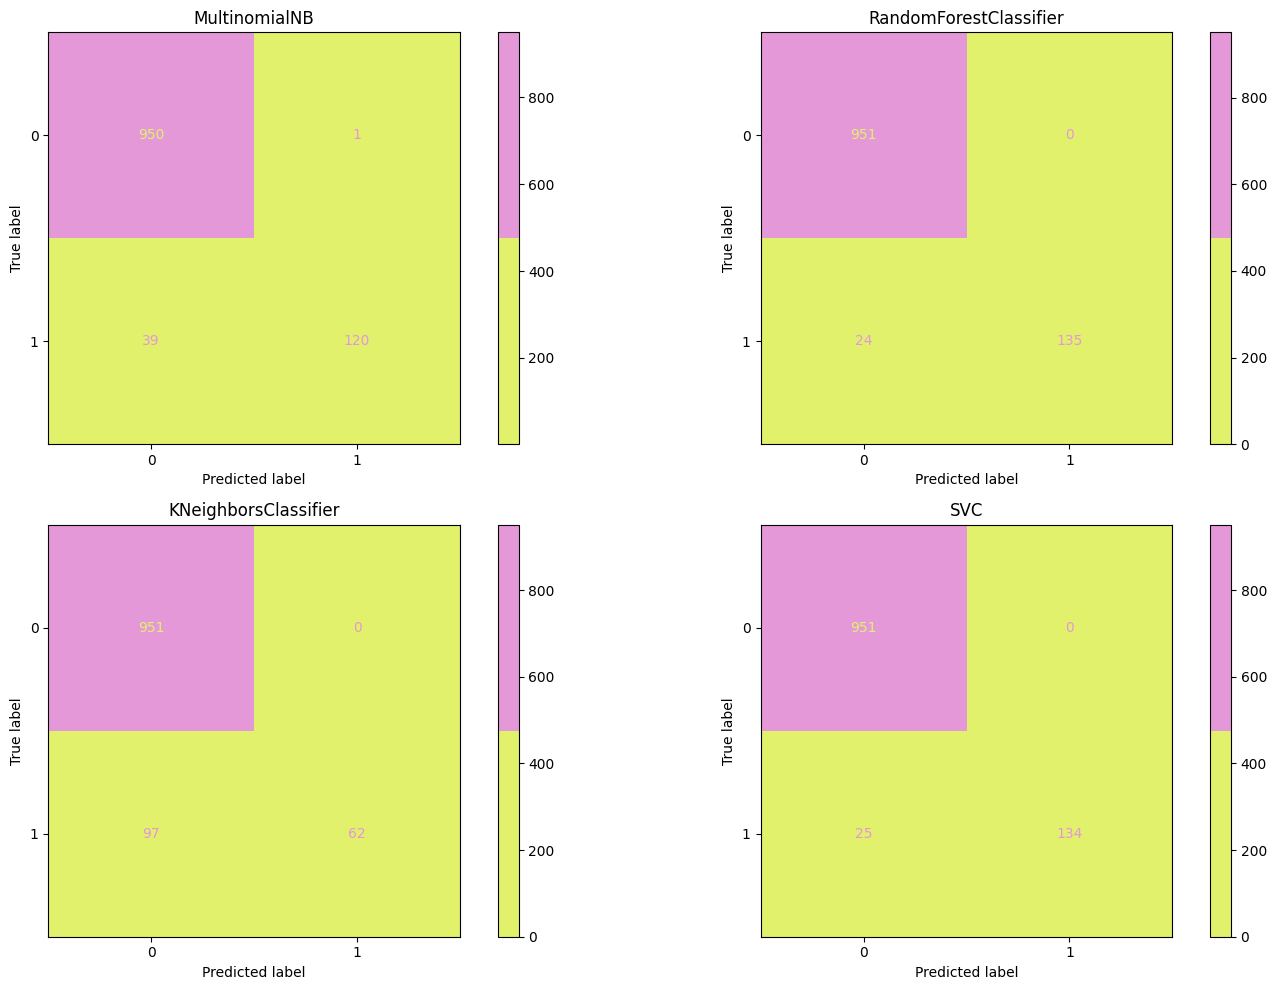

In [ ]:
%pip install scikit-learn

from sklearn.metrics import ConfusionMatrixDisplay
cmap = ListedColormap(["#E1F16B", "#E598D8"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    cm = metrics.confusion_matrix(y_test, cls.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
    disp.plot(ax=ax, cmap=cmap)

    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()

In [31]:



filename = f"RandomForest.joblib"
best_model = joblib.load(filename)
tfidf = joblib.load("tfidf_vectorizer.joblib")

def classify_sms(sms_message):
    sms_vectorized = tfidf.transform([sms_message]) 
    prediction = model.predict(sms_vectorized)[0]
    return "ham" if prediction == 0 else "spam"

# Example usage
sms_to_classify = "spam,WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,,,."
prediction_result = classify_sms(sms_to_classify)
print(f"The SMS is classified as: {prediction_result}")


The SMS is classified as: spam
